In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import AutoLocator, AutoMinorLocator, FixedLocator, FixedFormatter, LogLocator, StrMethodFormatter
from matplotlib import patches
from astropy.visualization import ZScaleInterval, ImageNormalize, LogStretch, AsymmetricPercentileInterval, SqrtStretch
from astropy.io import fits
import h5py
from matplotlib.path import Path
from astropy.nddata import CCDData
from scipy import ndimage


In [2]:
Te_median_frame = CCDData.read("../../src/EclipseSpectra2017/Alliance/AllianceFeXIV_FeXITemperature.fits",unit="adu")
Te_median_image = Te_median_frame.data
sun_center_Te = (np.float64(Te_median_frame.header["SUNX"]),np.float64(Te_median_frame.header["SUNY"]))
Te_median_xslice = slice(372-300,372+301)
Te_median_yslice = slice(382-220,382+221)
Te_median_cutout = Te_median_image[Te_median_yslice, Te_median_xslice]
Te_median_image_rot_scipy = ndimage.rotate(Te_median_cutout, angle=360 - np.float64(Te_median_frame.header["SUNROT"]),reshape=False,order=1)
Te_center_offset = np.array([sun_center_Te[0]-373, sun_center_Te[1]-383])
Te_center_offset_rot = np.array([Te_center_offset[0]*np.cos(np.deg2rad(np.float64(360-np.float64(Te_median_frame.header["SUNROT"])))) - Te_center_offset[1]*np.sin(np.deg2rad(np.float64(360-np.float64(Te_median_frame.header["SUNROT"])))), 
                                  Te_center_offset[0]*np.sin(np.deg2rad(np.float64(360-np.float64(Te_median_frame.header["SUNROT"])))) + Te_center_offset[1]*np.cos(np.deg2rad(np.float64(360-np.float64(Te_median_frame.header["SUNROT"]))))])

In [3]:
Te_high_frame = CCDData.read("../../src/EclipseSpectra2017/Alliance/AllianceFeXIV_FeXITemperatureHigh.fits",unit="adu")
Te_high_image = Te_high_frame.data
Te_high_xslice = slice(372-300,372+301)
Te_high_yslice = slice(382-220,382+221)
Te_high_cutout = Te_high_image[Te_high_yslice, Te_high_xslice]
Te_high_image_rot_scipy = ndimage.rotate(Te_high_cutout, angle=360 - np.float64(Te_high_frame.header["SUNROT"]),reshape=False,order=1)

In [4]:
Te_low_frame = CCDData.read("../../src/EclipseSpectra2017/Alliance/AllianceFeXIV_FeXITemperatureLow.fits",unit="adu")
Te_low_image = Te_low_frame.data
Te_low_xslice = slice(372-300,372+301)
Te_low_yslice = slice(382-220,382+221)
Te_low_cutout = Te_low_image[Te_low_yslice, Te_low_xslice]
Te_low_image_rot_scipy = ndimage.rotate(Te_low_cutout, angle=360 - np.float64(Te_low_frame.header["SUNROT"]),reshape=False,order=1)

In [5]:
sun_center_Te

(372.7, 383.45)

In [6]:
with h5py.File("../../sav/Eclipse/FitResults/FeXIV_63.h5", 'r') as hf:
    green_fit_matrix_ext = hf['green_fit_matrix_ext'][:]
    green_fit_matrix_ext_err = hf['green_fit_matrix_ext_err'][:]
    green_fit_matrix_bin_ext = hf['green_fit_matrix_bin_ext'][:]
    green_fit_matrix_bin_ext_err = hf['green_fit_matrix_bin_ext_err'][:]
    green_fit_filename_index = hf['green_fit_filename_index'][:]

In [7]:
with h5py.File("../../sav/Eclipse/FitResults/FeX_52.h5", 'r') as hf:
    red_fit_matrix_ext = hf['red_fit_matrix_ext'][:]
    red_fit_matrix_ext_err = hf['red_fit_matrix_ext_err'][:]
    red_fit_matrix_bin_ext = hf['red_fit_matrix_bin_ext'][:]
    red_fit_matrix_bin_ext_err = hf['red_fit_matrix_bin_ext_err'][:]
    red_fit_filename_index = hf['red_fit_filename_index'][:]
    red_fit_filename_index = hf['red_fit_filename_index'][:]

In [8]:
slit_pos = 209.4
rsun_arcsec = 950.0
rsun_context_pixel = 71.4
pixel_ratio = rsun_context_pixel/np.float64(Te_median_frame.header["MOONR"])
img_pixel_to_arcsec = np.float64(Te_median_frame.header["SUNR"])/rsun_arcsec
pixel_ratio_to_arcsec = rsun_context_pixel/np.float64(Te_median_frame.header["MOONR"])*img_pixel_to_arcsec
rotate_angle_context = -27.5

In [10]:
img_center = np.array([300,220]) + Te_center_offset_rot

def func_img_xpixel_to_xarcsec(x):
    return (x - img_center[0])/img_pixel_to_arcsec

def func_img_xarcsec_to_xpixel(x):
    return x*img_pixel_to_arcsec + img_center[0]

def func_img_ypixel_to_yarcsec(x):
    return (x - img_center[1])/img_pixel_to_arcsec

def func_img_yarcsec_to_ypixel(x):
    return x*img_pixel_to_arcsec + img_center[1]

In [11]:
img_xpixel_array = np.arange(Te_median_image_rot_scipy.shape[1])
img_ypixel_array = np.arange(Te_median_image_rot_scipy.shape[0])

img_xarcsec_array = func_img_xpixel_to_xarcsec(img_xpixel_array)
img_yarcsec_array = func_img_ypixel_to_yarcsec(img_ypixel_array)

img_xmesh, img_ymesh = np.meshgrid(img_xarcsec_array, img_yarcsec_array)

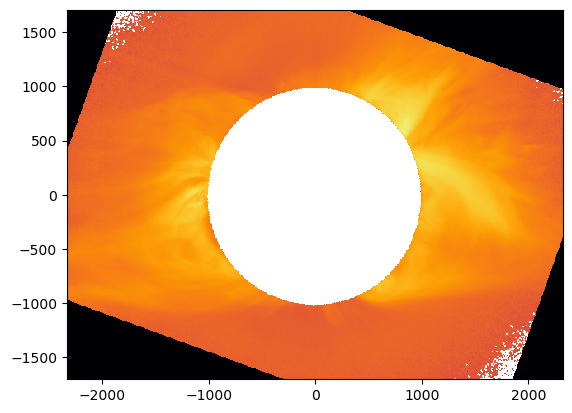

In [12]:
plt.pcolormesh(img_xmesh, img_ymesh, Te_median_image_rot_scipy, cmap="inferno", vmin=5.0e+5, vmax=1.5e+6,rasterized=True)

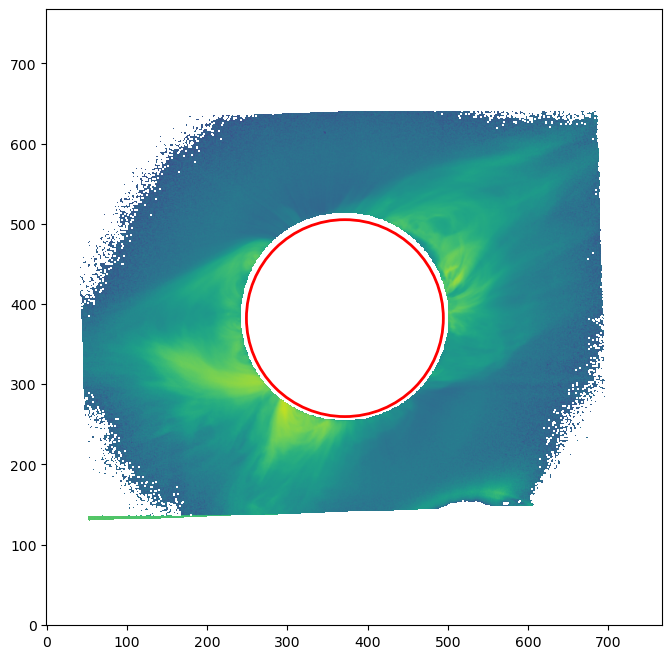

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
ax.imshow(Te_median_image,origin="lower")
ax.add_patch(patches.Circle((sun_center_Te[0]-1,sun_center_Te[1]-1),radius=np.float64(Te_median_frame.header["SUNR"]),fill=False,color="red",lw=2))

In [13]:
Te_median_FeXIV_resample = np.full(green_fit_matrix_bin_ext.shape[1:],np.nan)
Te_high_FeXIV_resample = np.full(green_fit_matrix_bin_ext.shape[1:],np.nan)
Te_low_FeXIV_resample = np.full(green_fit_matrix_bin_ext.shape[1:],np.nan)

Te_median_FeX_resample = np.full(red_fit_matrix_bin_ext.shape[1:],np.nan)
Te_high_FeX_resample = np.full(red_fit_matrix_bin_ext.shape[1:],np.nan)
Te_low_FeX_resample = np.full(red_fit_matrix_bin_ext.shape[1:],np.nan)

In [14]:
with h5py.File("../../sav/Eclipse/DataGrid/FeXIV_bin_grid.h5", 'r') as hf:
    pamis_gridedge_mesh_x_green = hf['pamis_gridedge_mesh_x'][:]
    pamis_gridedge_mesh_y_green = hf['pamis_gridedge_mesh_y'][:]

with h5py.File("../../sav/Eclipse/DataGrid/FeX_bin_grid.h5", 'r') as hf:
    pamis_gridedge_mesh_x_red = hf['pamis_gridedge_mesh_x'][:]
    pamis_gridedge_mesh_y_red = hf['pamis_gridedge_mesh_y'][:]

In [15]:
ii = 0
comp_delete_list_green = []

while ii < (pamis_gridedge_mesh_x_green.shape[1] - 1):
    if green_fit_filename_index[ii] < 0:
        comp_delete_list_green.append(ii)
        ii = ii + 1
        continue
    else:
        kk = 0
        while (ii+kk < pamis_gridedge_mesh_x_green.shape[1] - 2) and (np.abs(green_fit_filename_index[ii+kk] - green_fit_filename_index[ii+kk+1]) < 1e-3):
            kk = kk + 1
            comp_delete_list_green.append(ii+kk)
        for jj in range(pamis_gridedge_mesh_x_green.shape[0] - 1):
            leftbottom = (pamis_gridedge_mesh_x_green[jj,ii], pamis_gridedge_mesh_y_green[jj,ii])
            rightbottom = (pamis_gridedge_mesh_x_green[jj,ii+kk+1], pamis_gridedge_mesh_y_green[jj,ii+kk+1])
            righttop = (pamis_gridedge_mesh_x_green[jj+1,ii+kk+1], pamis_gridedge_mesh_y_green[jj+1,ii+kk+1])
            lefttop = (pamis_gridedge_mesh_x_green[jj+1,ii], pamis_gridedge_mesh_y_green[jj+1,ii])
            pamis_poly = Path([leftbottom, rightbottom, righttop, lefttop])
            
            mask_in_pamis_pixel = pamis_poly.contains_points(np.vstack((img_xmesh.flatten(), img_ymesh.flatten())).T).reshape(img_xmesh.shape)
            Te_median_FeXIV_resample[jj,ii:ii+kk+1] = np.nanmean(Te_median_image_rot_scipy[mask_in_pamis_pixel])
            Te_high_FeXIV_resample[jj,ii:ii+kk+1] = np.nanmean(Te_high_image_rot_scipy[mask_in_pamis_pixel])
            Te_low_FeXIV_resample[jj,ii:ii+kk+1] = np.nanmean(Te_low_image_rot_scipy[mask_in_pamis_pixel])
        ii = ii + kk + 1



/var/folders/9p/kj06pc4s4m30vcklbzw2hhgw0000gn/T/ipykernel_47876/2281255386.py:11: RuntimeWarning: overflow encountered in scalar subtract
  while (ii+kk < pamis_gridedge_mesh_x_green.shape[1] - 2) and (np.abs(green_fit_filename_index[ii+kk] - green_fit_filename_index[ii+kk+1]) < 1e-3):
/var/folders/9p/kj06pc4s4m30vcklbzw2hhgw0000gn/T/ipykernel_47876/2281255386.py:22: RuntimeWarning: Mean of empty slice
  Te_median_FeXIV_resample[jj,ii:ii+kk+1] = np.nanmean(Te_median_image_rot_scipy[mask_in_pamis_pixel])
/var/folders/9p/kj06pc4s4m30vcklbzw2hhgw0000gn/T/ipykernel_47876/2281255386.py:23: RuntimeWarning: Mean of empty slice
  Te_high_FeXIV_resample[jj,ii:ii+kk+1] = np.nanmean(Te_high_image_rot_scipy[mask_in_pamis_pixel])
/var/folders/9p/kj06pc4s4m30vcklbzw2hhgw0000gn/T/ipykernel_47876/2281255386.py:24: RuntimeWarning: Mean of empty slice
  Te_low_FeXIV_resample[jj,ii:ii+kk+1] = np.nanmean(Te_low_image_rot_scipy[mask_in_pamis_pixel])


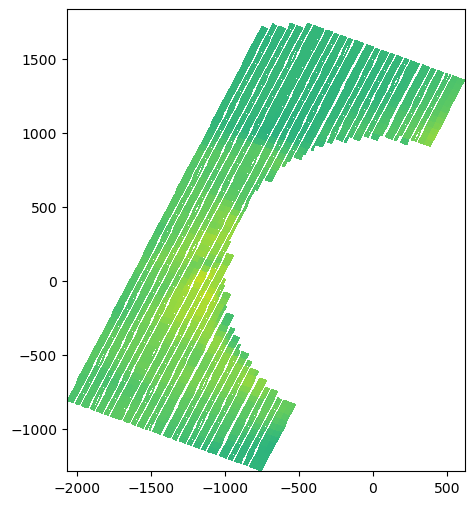

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
ax.pcolormesh(pamis_gridedge_mesh_x_green, pamis_gridedge_mesh_y_green, Te_median_FeXIV_resample, vmin=5e5,vmax=1.5e6)
ax.set_aspect('equal')

In [17]:
ii = 0
comp_delete_list_red = []

while ii < (pamis_gridedge_mesh_x_red.shape[1] - 1):
    if red_fit_filename_index[ii] < 0:
        comp_delete_list_red.append(ii)
        ii = ii + 1
        continue
    else:
        kk = 0
        while (ii+kk < pamis_gridedge_mesh_x_red.shape[1] - 2) and (np.abs(red_fit_filename_index[ii+kk] - red_fit_filename_index[ii+kk+1]) < 1e-3):
            kk = kk + 1
            comp_delete_list_red.append(ii+kk)
        for jj in range(pamis_gridedge_mesh_x_red.shape[0] - 1):
            leftbottom = (pamis_gridedge_mesh_x_red[jj,ii], pamis_gridedge_mesh_y_red[jj,ii])
            rightbottom = (pamis_gridedge_mesh_x_red[jj,ii+kk+1], pamis_gridedge_mesh_y_red[jj,ii+kk+1])
            righttop = (pamis_gridedge_mesh_x_red[jj+1,ii+kk+1], pamis_gridedge_mesh_y_red[jj+1,ii+kk+1])
            lefttop = (pamis_gridedge_mesh_x_red[jj+1,ii], pamis_gridedge_mesh_y_red[jj+1,ii])
            pamis_poly = Path([leftbottom, rightbottom, righttop, lefttop])
            
            mask_in_pamis_pixel = pamis_poly.contains_points(np.vstack((img_xmesh.flatten(), img_ymesh.flatten())).T).reshape(img_xmesh.shape)
            Te_median_FeX_resample[jj,ii:ii+kk+1] = np.nanmean(Te_median_image_rot_scipy[mask_in_pamis_pixel])
            Te_high_FeX_resample[jj,ii:ii+kk+1] = np.nanmean(Te_high_image_rot_scipy[mask_in_pamis_pixel])
            Te_low_FeX_resample[jj,ii:ii+kk+1] = np.nanmean(Te_low_image_rot_scipy[mask_in_pamis_pixel])
        ii = ii + kk + 1



/var/folders/9p/kj06pc4s4m30vcklbzw2hhgw0000gn/T/ipykernel_47876/1379943955.py:11: RuntimeWarning: overflow encountered in scalar subtract
  while (ii+kk < pamis_gridedge_mesh_x_red.shape[1] - 2) and (np.abs(red_fit_filename_index[ii+kk] - red_fit_filename_index[ii+kk+1]) < 1e-3):
/var/folders/9p/kj06pc4s4m30vcklbzw2hhgw0000gn/T/ipykernel_47876/1379943955.py:22: RuntimeWarning: Mean of empty slice
  Te_median_FeX_resample[jj,ii:ii+kk+1] = np.nanmean(Te_median_image_rot_scipy[mask_in_pamis_pixel])


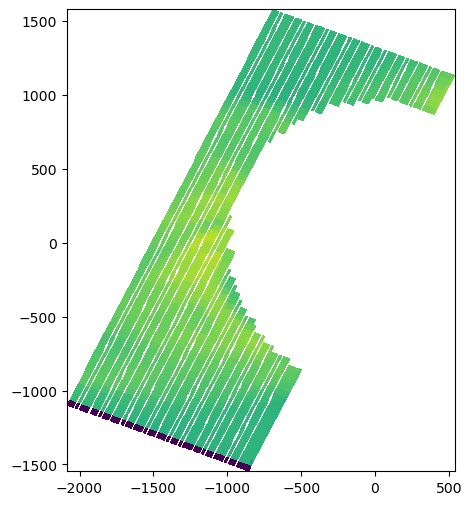

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
ax.pcolormesh(pamis_gridedge_mesh_x_red, pamis_gridedge_mesh_y_red, Te_median_FeX_resample, vmin=5e5,vmax=1.5e6)
ax.set_aspect('equal')

In [19]:
with h5py.File("../../sav/Eclipse/TeBoe2020/Te_resample_Boe2020.h5","w") as hf:
    df_Te_median_FeXIV_resample = hf.create_dataset("Te_median_FeXIV_resample", data=Te_median_FeXIV_resample)
    df_Te_high_FeXIV_resample = hf.create_dataset("Te_high_FeXIV_resample", data=Te_high_FeXIV_resample)
    df_Te_low_FeXIV_resample = hf.create_dataset("Te_low_FeXIV_resample", data=Te_low_FeXIV_resample)

    df_Te_median_FeX_resample = hf.create_dataset("Te_median_FeX_resample", data=Te_median_FeX_resample)
    df_Te_high_FeX_resample = hf.create_dataset("Te_high_FeX_resample", data=Te_high_FeX_resample)
    df_Te_low_FeX_resample = hf.create_dataset("Te_low_FeX_resample", data=Te_low_FeX_resample)

    df_delete_list_green = hf.create_dataset("comp_delete_list_green", data=comp_delete_list_green)
    df_delete_list_red = hf.create_dataset("comp_delete_list_red", data=comp_delete_list_red)